In [110]:
import pandas as pd 
import numpy as np
import seaborn as sns
sns.set()
from sklearn.metrics import roc_auc_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import sklearn.metrics as metrics
from sklearn.cluster import SpectralClustering
from sklearn import mixture
from sklearn.cluster import AgglomerativeClustering
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import cdist
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
from sklearn.cluster import MiniBatchKMeans
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from missingpy import KNNImputer
from sklearn.preprocessing import MinMaxScaler

In [111]:
project = pd.read_csv("/Users/capio/Dropbox/SCHOOL/FALL 2018/STAT 517/FINAL PROJECT/Data/data1.csv")
project.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,gene_11,gene_12,gene_13,gene_14,gene_15,...,gene_20514,gene_20515,gene_20516,gene_20517,gene_20518,gene_20519,gene_20520,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,0.591871,1.334282,2.015391,0.591871,0.0,0.0,...,7.128881,7.175175,9.249369,7.025970,8.045563,7.475709,7.205236,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,0.000000,0.587845,2.466601,1.004394,0.0,0.0,...,6.047558,8.572901,7.549030,7.019935,9.458940,9.190867,10.639259,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,0.000000,0.452595,1.981122,1.074163,0.0,0.0,...,6.661493,7.716332,6.745802,7.524667,8.602350,9.036654,10.336027,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,0.000000,0.434882,2.874246,0.000000,0.0,0.0,...,7.613915,8.963286,7.744699,7.924997,8.981473,8.665592,9.194823,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,0.000000,1.275841,2.141204,0.000000,0.0,0.0,...,6.505099,8.948989,7.010366,7.364056,8.950646,8.233366,9.298775,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [112]:
labels=pd.read_csv(("/Users/capio/Dropbox/SCHOOL/FALL 2018/STAT 517/FINAL PROJECT/Data/labels.csv")).Class
labels.head()

0    PRAD
1    LUAD
2    PRAD
3    PRAD
4    BRCA
Name: Class, dtype: object

In [113]:
project.insert(loc = 0, column = 'Class', value = labels)
project.head()

,Class,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,gene_11,gene_12,gene_13,gene_14,...,gene_20514,gene_20515,gene_20516,gene_20517,gene_20518,gene_20519,gene_20520,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,PRAD,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,0.591871,1.334282,2.015391,0.591871,0.0,...,7.128881,7.175175,9.249369,7.025970,8.045563,7.475709,7.205236,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,LUAD,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,0.000000,0.587845,2.466601,1.004394,0.0,...,6.047558,8.572901,7.549030,7.019935,9.458940,9.190867,10.639259,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,PRAD,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,0.000000,0.452595,1.981122,1.074163,0.0,...,6.661493,7.716332,6.745802,7.524667,8.602350,9.036654,10.336027,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,PRAD,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,0.000000,0.434882,2.874246,0.000000,0.0,...,7.613915,8.963286,7.744699,7.924997,8.981473,8.665592,9.194823,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,BRCA,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,0.000000,1.275841,2.141204,0.000000,0.0,...,6.505099,8.948989,7.010366,7.364056,8.950646,8.233366,9.298775,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [114]:
del project['Unnamed: 0']

In [115]:
project.head()

,Class,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,gene_11,gene_12,gene_13,gene_14,gene_15,...,gene_20514,gene_20515,gene_20516,gene_20517,gene_20518,gene_20519,gene_20520,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,PRAD,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,0.591871,1.334282,2.015391,0.591871,0.0,0.0,...,7.128881,7.175175,9.249369,7.025970,8.045563,7.475709,7.205236,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,LUAD,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,0.000000,0.587845,2.466601,1.004394,0.0,0.0,...,6.047558,8.572901,7.549030,7.019935,9.458940,9.190867,10.639259,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,PRAD,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,0.000000,0.452595,1.981122,1.074163,0.0,0.0,...,6.661493,7.716332,6.745802,7.524667,8.602350,9.036654,10.336027,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,PRAD,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,0.000000,0.434882,2.874246,0.000000,0.0,0.0,...,7.613915,8.963286,7.744699,7.924997,8.981473,8.665592,9.194823,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,BRCA,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,0.000000,1.275841,2.141204,0.000000,0.0,0.0,...,6.505099,8.948989,7.010366,7.364056,8.950646,8.233366,9.298775,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [116]:
project.shape

(801, 20532)

In [117]:
project.rename( columns={'Unnamed: 0':'Labels'}, inplace=True )
project.head()

,Class,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,gene_11,gene_12,gene_13,gene_14,gene_15,...,gene_20514,gene_20515,gene_20516,gene_20517,gene_20518,gene_20519,gene_20520,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,PRAD,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,0.591871,1.334282,2.015391,0.591871,0.0,0.0,...,7.128881,7.175175,9.249369,7.025970,8.045563,7.475709,7.205236,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,LUAD,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,0.000000,0.587845,2.466601,1.004394,0.0,0.0,...,6.047558,8.572901,7.549030,7.019935,9.458940,9.190867,10.639259,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,PRAD,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,0.000000,0.452595,1.981122,1.074163,0.0,0.0,...,6.661493,7.716332,6.745802,7.524667,8.602350,9.036654,10.336027,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,PRAD,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,0.000000,0.434882,2.874246,0.000000,0.0,0.0,...,7.613915,8.963286,7.744699,7.924997,8.981473,8.665592,9.194823,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,BRCA,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,0.000000,1.275841,2.141204,0.000000,0.0,0.0,...,6.505099,8.948989,7.010366,7.364056,8.950646,8.233366,9.298775,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [118]:
proj=project.loc[:, ~project.columns.str.contains('Class')]
proj.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,gene_11,gene_12,gene_13,gene_14,gene_15,gene_16,...,gene_20514,gene_20515,gene_20516,gene_20517,gene_20518,gene_20519,gene_20520,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,0.591871,1.334282,2.015391,0.591871,0.0,0.0,0.0,...,7.128881,7.175175,9.249369,7.025970,8.045563,7.475709,7.205236,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,0.000000,0.587845,2.466601,1.004394,0.0,0.0,0.0,...,6.047558,8.572901,7.549030,7.019935,9.458940,9.190867,10.639259,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,0.000000,0.452595,1.981122,1.074163,0.0,0.0,0.0,...,6.661493,7.716332,6.745802,7.524667,8.602350,9.036654,10.336027,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,0.000000,0.434882,2.874246,0.000000,0.0,0.0,0.0,...,7.613915,8.963286,7.744699,7.924997,8.981473,8.665592,9.194823,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,0.000000,1.275841,2.141204,0.000000,0.0,0.0,0.0,...,6.505099,8.948989,7.010366,7.364056,8.950646,8.233366,9.298775,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [11]:
proj.isnull().sum() #no missing values

gene_0        0
gene_1        0
gene_2        0
gene_3        0
gene_4        0
gene_5        0
gene_6        0
gene_7        0
gene_8        0
gene_9        0
gene_10       0
gene_11       0
gene_12       0
gene_13       0
gene_14       0
gene_15       0
gene_16       0
gene_17       0
gene_18       0
gene_19       0
gene_20       0
gene_21       0
gene_22       0
gene_23       0
gene_24       0
gene_25       0
gene_26       0
gene_27       0
gene_28       0
gene_29       0
             ..
gene_20501    0
gene_20502    0
gene_20503    0
gene_20504    0
gene_20505    0
gene_20506    0
gene_20507    0
gene_20508    0
gene_20509    0
gene_20510    0
gene_20511    0
gene_20512    0
gene_20513    0
gene_20514    0
gene_20515    0
gene_20516    0
gene_20517    0
gene_20518    0
gene_20519    0
gene_20520    0
gene_20521    0
gene_20522    0
gene_20523    0
gene_20524    0
gene_20525    0
gene_20526    0
gene_20527    0
gene_20528    0
gene_20529    0
gene_20530    0
Length: 20531, dtype: in

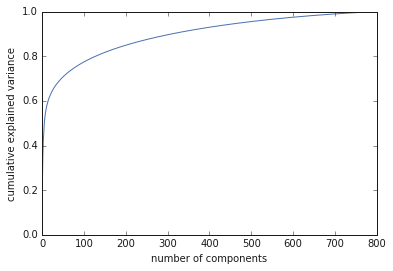

In [12]:
# PCA

from sklearn.decomposition import PCA
pca = PCA().fit(proj)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

#from below, about 700 components can be used to explain almost all variation

In [13]:
#With so many columns, this project will be a good dataset to use Principle Component Analysis on. 
#First, I will find how many PCs will explain the majority of variance.
#Around 700 and almost all the variance can be explained. I will use 700 components

print(pca.explained_variance_ratio_)

[1.58385502e-01 1.05039600e-01 9.47222083e-02 6.50080336e-02
 3.61561783e-02 2.97266705e-02 2.65714239e-02 1.56273075e-02
 1.40707327e-02 1.22687325e-02 9.60110033e-03 8.90219244e-03
 7.58205527e-03 7.23021295e-03 6.64002139e-03 6.37713380e-03
 5.69484775e-03 5.17577102e-03 4.62121409e-03 4.45511704e-03
 4.43458295e-03 4.06433767e-03 3.95469831e-03 3.73193404e-03
 3.68555898e-03 3.55682493e-03 3.48486339e-03 3.16722678e-03
 3.10381215e-03 2.95236028e-03 2.89217028e-03 2.76294055e-03
 2.73106816e-03 2.62048411e-03 2.51405018e-03 2.51115763e-03
 2.40637037e-03 2.35678917e-03 2.32169987e-03 2.25441828e-03
 2.22014731e-03 2.17486887e-03 2.12139803e-03 2.10345082e-03
 2.08597543e-03 2.04290041e-03 1.96472299e-03 1.95728543e-03
 1.93418289e-03 1.89133509e-03 1.81771843e-03 1.78520804e-03
 1.75768926e-03 1.72698808e-03 1.70410487e-03 1.67957902e-03
 1.64251866e-03 1.62876591e-03 1.61259105e-03 1.57999194e-03
 1.57141842e-03 1.55484061e-03 1.54252341e-03 1.51270505e-03
 1.48299684e-03 1.476603

In [19]:
pca = PCA(n_components=700)
pca.fit(proj)

PCA(copy=True, iterated_power='auto', n_components=700, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [20]:
#I will create a new dataframe with the 700 principle components as the columns.
#PCA took the original data from 20532 columns down to the 700 columns of PCs.

n_components=700
pcadf=pd.DataFrame(pca.transform(proj), columns=['PCA%i' % i for i in range(n_components)], index=proj.index)
pcadf.head()

,PCA0,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,...,PCA690,PCA691,PCA692,PCA693,PCA694,PCA695,PCA696,PCA697,PCA698,PCA699
0,-62.755415,-94.071973,89.519831,-15.942567,81.423539,-13.998292,7.716073,-22.936551,-32.837892,-2.202680,...,0.487105,-4.959086,2.607625,1.471149,-2.712578,0.143555,4.013209,-0.098882,-1.208119,-1.455883
1,-2.432896,90.585842,-1.067308,-53.083120,-15.676684,60.842472,10.257369,-48.822959,14.257400,-12.214352,...,1.155929,-0.844741,2.109080,-0.456246,0.590957,1.246171,-0.712239,-0.597453,-0.101444,-0.215700
2,-71.266853,-8.064608,66.112455,81.381475,-7.525685,109.824273,5.519407,-13.364480,38.415728,-5.124731,...,0.167772,-0.782897,0.799627,-0.061543,-0.056552,-0.128933,0.861541,-0.920487,-0.780346,0.510836
3,-84.770785,-73.244566,74.181000,27.022697,-18.044895,50.116433,-3.495197,-11.318520,8.319656,-3.149509,...,1.949281,-0.761390,-0.287705,2.853647,-2.056516,-3.179038,-0.751818,0.202917,0.987644,-1.875863
4,-69.560171,-9.612940,-67.497549,34.868543,-1.795849,-6.676780,-2.840781,16.780157,-49.319753,10.508631,...,-0.060329,3.300134,-0.338086,6.377600,2.155049,-1.512922,1.854517,-4.842936,-0.081016,1.672087


In [21]:
proj_pca=pca.transform(proj)
print("Original shape: {}".format(str(proj.shape)))
print("Reduced shape: {}".format(str(proj_pca.shape)))


Original shape: (801, 20531)
Reduced shape: (801, 700)


In [22]:
#Now that the data has been transformed into principle components I will use Kmeans to cluster.
#First I'll just use 5 clusters and see what my silhouette score is. 
#I will also run this on the original data for comparison.

In [23]:
# K MEANS CLUSTERING

In [25]:
#Silhouette score for pca data
from sklearn import metrics
metrics.silhouette_score(proj_pca, kmeans.labels_)

0.2287493724969654

In [26]:
#Silhouette score for non-pca data
from sklearn import metrics
metrics.silhouette_score(proj, kmeans.labels_)

0.2246929336121642

In [27]:
#I will run an optimization to find the optimal number of clusters on Kmeans for the NON-PCA data first,
#the on the transformed PCA data to see how they compare.


The optimal number of neighbors is 6


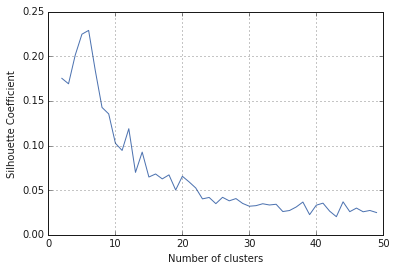

In [28]:
k_range = range(2, 50)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(proj)
    scores.append(metrics.silhouette_score(proj, km.labels_))

optimal_k = k_range[scores.index(max(scores))]
print "The optimal number of neighbors is %d" % optimal_k
    
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

The optimal number of clusters is 6


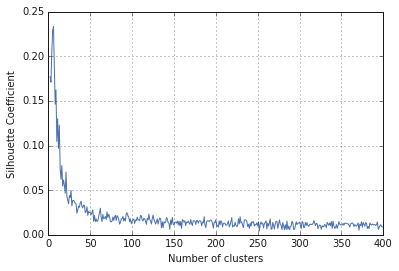

In [32]:
#Now finding optimal clusters using the PCA data.

k_range = range(2, 400)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(proj_pca)
    scores.append(metrics.silhouette_score(proj_pca, km.labels_))

optimal_k = k_range[scores.index(max(scores))]
print "The optimal number of clusters is %d" % optimal_k    
    
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [33]:
#Perform a Kmeans clustering using my optimal groups

from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=6, random_state=1).fit(proj_pca)

In [34]:
pcadf['cluster'] = kmeans.labels_
pcadf.head(5)

,PCA0,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,...,PCA691,PCA692,PCA693,PCA694,PCA695,PCA696,PCA697,PCA698,PCA699,cluster
0,-62.755415,-94.071973,89.519831,-15.942567,81.423539,-13.998292,7.716073,-22.936551,-32.837892,-2.202680,...,-4.959086,2.607625,1.471149,-2.712578,0.143555,4.013209,-0.098882,-1.208119,-1.455883,1
1,-2.432896,90.585842,-1.067308,-53.083120,-15.676684,60.842472,10.257369,-48.822959,14.257400,-12.214352,...,-0.844741,2.109080,-0.456246,0.590957,1.246171,-0.712239,-0.597453,-0.101444,-0.215700,0
2,-71.266853,-8.064608,66.112455,81.381475,-7.525685,109.824273,5.519407,-13.364480,38.415728,-5.124731,...,-0.782897,0.799627,-0.061543,-0.056552,-0.128933,0.861541,-0.920487,-0.780346,0.510836,1
3,-84.770785,-73.244566,74.181000,27.022697,-18.044895,50.116433,-3.495197,-11.318520,8.319656,-3.149509,...,-0.761390,-0.287705,2.853647,-2.056516,-3.179038,-0.751818,0.202917,0.987644,-1.875863,1
4,-69.560171,-9.612940,-67.497549,34.868543,-1.795849,-6.676780,-2.840781,16.780157,-49.319753,10.508631,...,3.300134,-0.338086,6.377600,2.155049,-1.512922,1.854517,-4.842936,-0.081016,1.672087,4


In [35]:
pcadf['group'] = project.Class
pcadf.head(5)

,PCA0,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,...,PCA692,PCA693,PCA694,PCA695,PCA696,PCA697,PCA698,PCA699,cluster,group
0,-62.755415,-94.071973,89.519831,-15.942567,81.423539,-13.998292,7.716073,-22.936551,-32.837892,-2.202680,...,2.607625,1.471149,-2.712578,0.143555,4.013209,-0.098882,-1.208119,-1.455883,1,PRAD
1,-2.432896,90.585842,-1.067308,-53.083120,-15.676684,60.842472,10.257369,-48.822959,14.257400,-12.214352,...,2.109080,-0.456246,0.590957,1.246171,-0.712239,-0.597453,-0.101444,-0.215700,0,LUAD
2,-71.266853,-8.064608,66.112455,81.381475,-7.525685,109.824273,5.519407,-13.364480,38.415728,-5.124731,...,0.799627,-0.061543,-0.056552,-0.128933,0.861541,-0.920487,-0.780346,0.510836,1,PRAD
3,-84.770785,-73.244566,74.181000,27.022697,-18.044895,50.116433,-3.495197,-11.318520,8.319656,-3.149509,...,-0.287705,2.853647,-2.056516,-3.179038,-0.751818,0.202917,0.987644,-1.875863,1,PRAD
4,-69.560171,-9.612940,-67.497549,34.868543,-1.795849,-6.676780,-2.840781,16.780157,-49.319753,10.508631,...,-0.338086,6.377600,2.155049,-1.512922,1.854517,-4.842936,-0.081016,1.672087,4,BRCA


In [36]:
pcadf.cluster.unique()

array([1, 0, 4, 2, 3, 5])

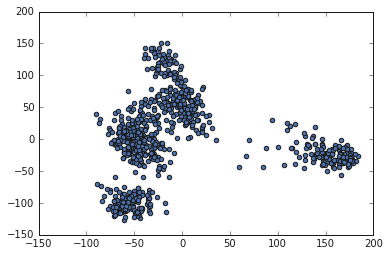

In [37]:
fig=plt.scatter(pcadf.PCA0,pcadf.PCA1)

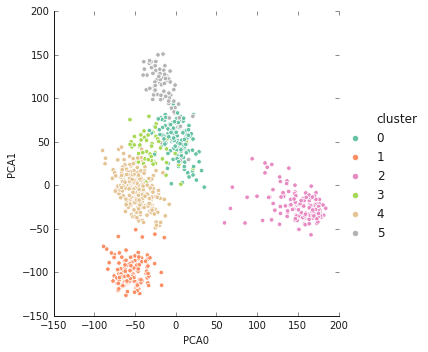

In [38]:
fig2=sns.relplot(x="PCA0", y="PCA1", data=pcadf, hue="cluster", legend='full', palette= 'Set2')


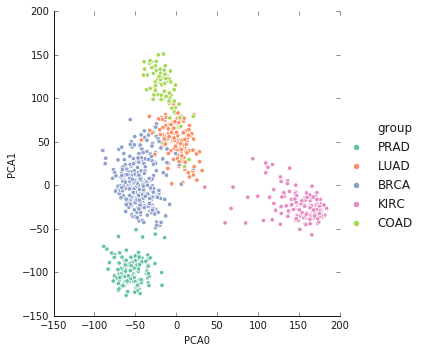

In [39]:
fig3=sns.relplot(x="PCA0", y="PCA1", data=pcadf, hue="group", palette= 'Set2')

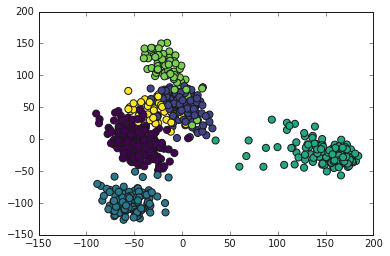

In [43]:
#Clustering with 200 PC's using Spectral Clustering

model = SpectralClustering(n_clusters=6, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(proj_pca)
plt.scatter(proj_pca[:, 0], proj_pca[:, 1], c=labels,s=50, cmap='viridis');

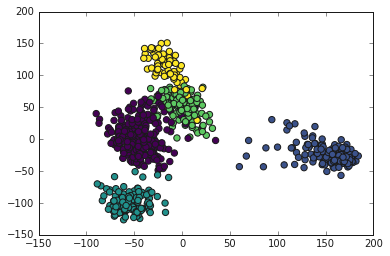

In [44]:
#Clustering with 200 PC's using Gaussian Mixture Modeling 

gmm = mixture.GaussianMixture(n_components=5).fit(proj_pca)
labels = gmm.predict(proj_pca)
plt.scatter(proj_pca[:, 0], proj_pca[:, 1], c=labels, s=40, cmap='viridis');

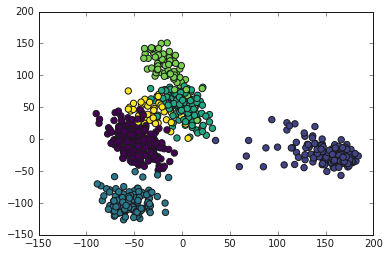

In [45]:
#Clustering with 200 PC's using Agglomerative Clustering

clustering = AgglomerativeClustering(n_clusters=6).fit(proj_pca)
labels = clustering.labels_
plt.scatter(proj_pca[:, 0], proj_pca[:, 1], c=labels, s=40, cmap='viridis')

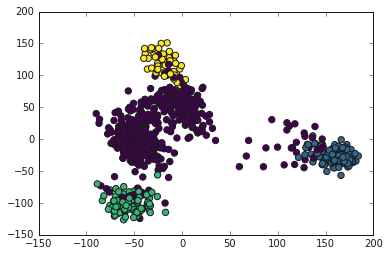

In [46]:
#Clustering with 200 PC's using DBSCAN

db = DBSCAN(eps=0.3, min_samples=10,metric='cosine').fit(proj_pca)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
plt.scatter(proj_pca[:, 0], proj_pca[:, 1], c=labels, s=40, cmap='viridis')

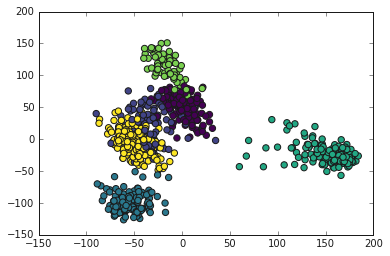

In [47]:
#Clustering with 200 PC's using MiniBatchKmeans

clustering = MiniBatchKMeans(n_clusters=6).fit(proj_pca)
labels = clustering.labels_
plt.scatter(proj_pca[:, 0], proj_pca[:, 1], c=labels, s=40, cmap='viridis')

In [48]:
#Dendrograms

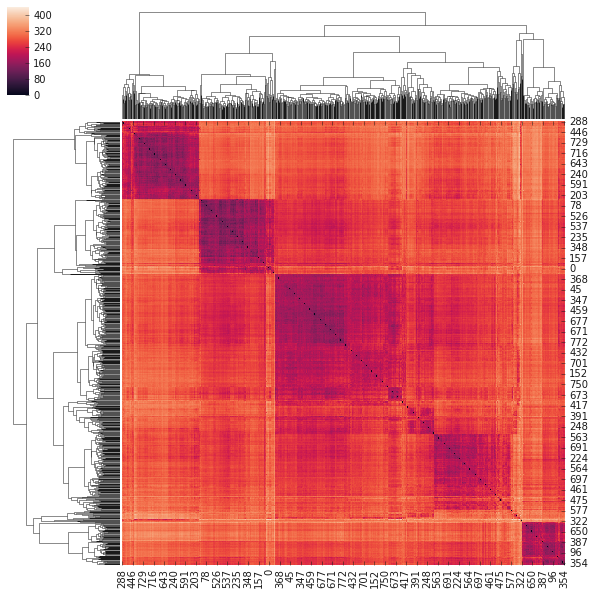

In [49]:
from scipy.spatial.distance import pdist, squareform
dm=squareform(pdist(proj))
h = sns.clustermap(dm,metric='euclidean')

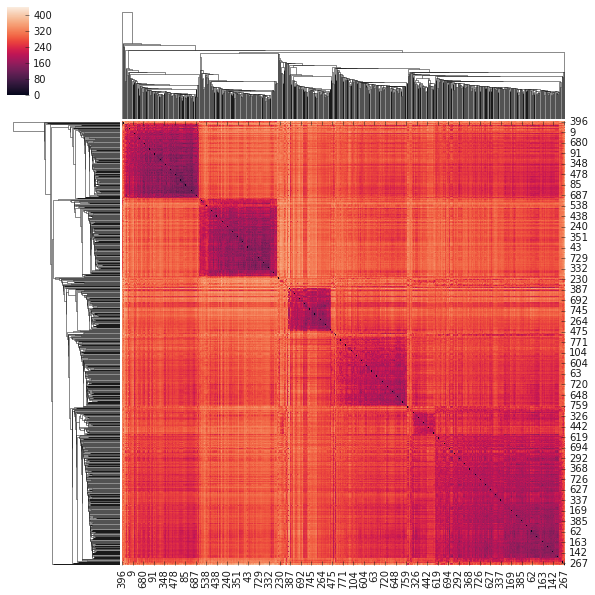

In [50]:
hs=sns.clustermap(dm,method="single")

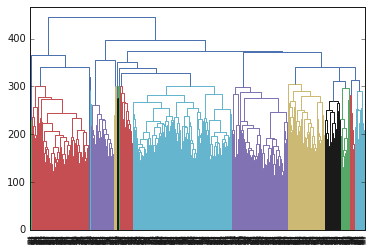

In [51]:
Z = linkage(proj, 'complete')
dn = dendrogram(Z)

In [52]:
#Crosstab of the groupings and Cluster will show how well my clustering was in comparison to the known groupings.
#There were some of the known groups that got cluster into unique groupings with my analysis. 
#There was also some overlap and splitting between some groups. But overall the clustering analysis did a good job


pd.set_option('display.max_columns', 35)
pd.crosstab(pcadf.cluster,pcadf.group,margins=True)

group,BRCA,COAD,KIRC,LUAD,PRAD,All
cluster,,,,,,
0,0,1,1,138,0,140
1,0,0,0,0,136,136
2,0,0,145,0,0,145
3,50,0,0,3,0,53
4,250,0,0,0,0,250
5,0,77,0,0,0,77
All,300,78,146,141,136,801


In [53]:
pcadf.groupby(['cluster','group']).size()

cluster  group
0        COAD       1
         KIRC       1
         LUAD     138
1        PRAD     136
2        KIRC     145
3        BRCA      50
         LUAD       3
4        BRCA     250
5        COAD      77
dtype: int64

In [54]:
pcadf.loc[pcadf['cluster']==0,'group']

1      LUAD
16     LUAD
22     LUAD
25     LUAD
37     LUAD
49     LUAD
51     LUAD
60     LUAD
61     KIRC
63     LUAD
73     LUAD
75     LUAD
104    LUAD
106    LUAD
108    LUAD
109    LUAD
112    LUAD
120    LUAD
122    LUAD
136    LUAD
144    LUAD
148    LUAD
149    LUAD
150    LUAD
151    LUAD
154    LUAD
159    LUAD
161    LUAD
165    LUAD
168    LUAD
       ... 
635    LUAD
636    LUAD
644    LUAD
645    LUAD
648    LUAD
659    LUAD
666    LUAD
675    LUAD
682    LUAD
685    LUAD
691    LUAD
697    LUAD
702    LUAD
706    LUAD
720    LUAD
721    LUAD
738    LUAD
749    LUAD
759    LUAD
761    LUAD
763    LUAD
771    LUAD
773    LUAD
776    LUAD
778    LUAD
779    LUAD
780    LUAD
795    LUAD
797    LUAD
798    COAD
Name: group, Length: 140, dtype: object

In [55]:
pd.pivot_table(pcadf,index=["cluster","group"])


PCA0        PCA1      PCA10    PCA100     PCA101  \
cluster group                                                           
0       COAD    10.486261   21.570595  21.149185 -4.879860  -1.599617   
        KIRC    35.054414   -2.086866  24.660604  4.787036 -22.238677   
        LUAD     1.633946   50.908720  -1.820190 -0.141557  -0.098873   
1       PRAD   -54.546923  -97.359342   0.982367  0.104291   0.105828   
2       KIRC   151.447207  -23.288322   3.112583  0.066408   0.234911   
3       BRCA   -30.347616   39.541935  -8.052267  0.371949  -0.260297   
        LUAD   -20.747905   60.490327  -5.039087 -2.463864  -0.405306   
4       BRCA   -48.128485   -4.628541   0.903653 -0.126807   0.034718   
5       COAD   -15.594064  111.316332  -2.438087  0.211827  -0.070397   

                  PCA102    PCA103    PCA104     PCA105    PCA106     PCA107  \
cluster group                                                                  
0       COAD   -3.773083  5.749354 -1.287641  18.030006  0.702556   5.539912   
        KIRC   25.705207 -2.870354 -1.517245  -7.820684 -4.628894  12.354451   
        LUAD   -0.122521  0.091444  0.012150  -0.029121 -0.042647  -0.047509   
1       PRAD   -0.044523 -0.226816 -0.102198   0.020285  0.088898   0.039552   
2       KIRC    0.138084  0.067774  0.035580  -0.048531 -0.004020  -0.023923   
3       BRCA   -0.289242 -0.004466 -0.589625  -0.659932  0.401519   0.738480   
        LUAD   -4.502204 -7.833086  8.377243   9.203038 -2.453037  -8.592931   
4       BRCA    0.049385  0.160511  0.075837   0.048566 -0.061351  -0.087075   
5       COAD   -0.043749 -0.141348 -0.061580  -0.112550  0.012015  -0.034087   

                  PCA108    PCA109      PCA11     PCA110    PCA111    PCA112  \
cluster group                                                                  
0       COAD   -9.367826  3.581563  62.176788   2.643756  6.139109 -7.070011   
        KIRC   14.220703 -5.179348   0.712635 -23.319585 -9.836104 -6.170704   
        LUAD   -0.006081  0.065218   1.161143  -0.139910  0.020375 -0.000427   
1       PRAD    0.119178 -0.061026  -2.805099   0.096733 -0.133523 -0.015299   
2       KIRC    0.015932 -0.031745   0.064312   0.149308 -0.026687  0.044584   
3       BRCA    0.074419  0.384107   1.393574   0.143277  0.564437  0.136564   
        LUAD   -9.820280 -1.210467 -16.419731  -2.343746  5.700363 -1.138821   
4       BRCA   -0.017641  0.000393   1.302393  -0.050936 -0.102711 -0.008896   
5       COAD    0.098936 -0.132105  -2.558137   0.230901  0.042451  0.100363   

                 ...          PCA84      PCA85     PCA86      PCA87  \
cluster group    ...                                                  
0       COAD     ...      10.110422  -2.548137  4.164035  -2.499732   
        KIRC     ...     -12.582119  18.045984  1.243481  21.933913   
        LUAD     ...       0.090346  -0.386325  0.335820  -0.059727   
1       PRAD     ...      -0.067615  -0.170176  0.023157  -0.380220   
2       KIRC     ...       0.141084   0.188424 -0.168422  -0.057913   
3       BRCA     ...       0.317629   1.429529 -0.055091  -0.573553   
        LUAD     ...      -4.564142  -7.677068  2.226723   4.134404   
4       BRCA     ...      -0.067615  -0.173538 -0.006978   0.108356   
5       COAD     ...      -0.084970   0.371125 -0.424156   0.494816   

                   PCA88      PCA89       PCA9     PCA90      PCA91  \
cluster group                                                         
0       COAD    0.808801   9.308460  59.967025 -2.397124   4.922595   
        KIRC  -10.930782  -1.675660  32.343041 -6.729997 -30.454489   
        LUAD    0.247562   0.154742   3.495006  0.147200   0.181340   
1       PRAD    0.010505   0.127906   0.349293 -0.012754  -0.144740   
2       KIRC   -0.071535   0.000081   1.241524  0.095430   0.194998   
3       BRCA   -0.439511  -0.496647 -15.406658  0.110377  -0.373563   
        LUAD    2.250767 -12.149669  29.848812 -3.658456  -4.175110   
4       BRCA   -0.146939   0.00214

In [56]:
#CLASSIFICATION MODELS

In [59]:
from sklearn.model_selection import train_test_split
y=project.Class
X=proj

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,random_state=1)

In [60]:
# LOGISTIC REGRESSION

In [61]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

/Users/capio/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/capio/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy of Logistic regression classifier on training set: 1.00
Accuracy of Logistic regression classifier on test set: 0.99


In [62]:
#Performing a 10 fold cross validation and precision for clusters
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
logreg=LogisticRegression()
predicted = cross_val_predict(logreg, X, y, cv=10)
print metrics.accuracy_score(y, predicted)
print metrics.classification_report(y, predicted) 


0.9987515605493134
              precision    recall  f1-score   support

        BRCA       1.00      1.00      1.00       300
        COAD       1.00      1.00      1.00        78
        KIRC       1.00      1.00      1.00       146
        LUAD       1.00      0.99      1.00       141
        PRAD       1.00      1.00      1.00       136

   micro avg       1.00      1.00      1.00       801
   macro avg       1.00      1.00      1.00       801
weighted avg       1.00      1.00      1.00       801



In [63]:
# K Nearest Neighbour

In [64]:
#Trying neighbors 5, 10 and 80
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train)
print("Test set R^2: {:.2f}".format(classifier.score(X_test, y_test)))

Test set R^2: 0.99


In [71]:
#KNN with 5 neighbors and 10 fold cross validation
classifier=KNeighborsClassifier(n_neighbors=5)
predicted=cross_val_predict(classifier, X,y,cv=10)
print metrics.accuracy_score(y, predicted)
print metrics.classification_report(y, predicted) 

0.9987515605493134
              precision    recall  f1-score   support

        BRCA       1.00      1.00      1.00       300
        COAD       1.00      1.00      1.00        78
        KIRC       1.00      1.00      1.00       146
        LUAD       1.00      0.99      1.00       141
        PRAD       1.00      1.00      1.00       136

   micro avg       1.00      1.00      1.00       801
   macro avg       1.00      1.00      1.00       801
weighted avg       1.00      1.00      1.00       801



In [74]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
print("Test set R^2: {:.2f}".format(knn.score(X_test, y_test)))

Test set R^2: 0.99


In [76]:
#KNN with 10 neighbors and 10 fold cross validation
from sklearn.metrics import classification_report, confusion_matrix   
classifier=KNeighborsClassifier(n_neighbors=10)
predicted=cross_val_predict(classifier, X,y,cv=10)
print metrics.accuracy_score(y, predicted)
print metrics.classification_report(y, predicted) 

0.9975031210986267
              precision    recall  f1-score   support

        BRCA       1.00      1.00      1.00       300
        COAD       1.00      0.99      0.99        78
        KIRC       1.00      1.00      1.00       146
        LUAD       0.99      0.99      0.99       141
        PRAD       1.00      1.00      1.00       136

   micro avg       1.00      1.00      1.00       801
   macro avg       1.00      1.00      1.00       801
weighted avg       1.00      1.00      1.00       801



In [77]:
cnn = KNeighborsClassifier(n_neighbors=80)
cnn.fit(X_train, y_train)
print("Test set R^2: {:.2f}".format(cnn.score(X_test, y_test)))

Test set R^2: 0.98


In [79]:
#KNN with 80 neighbors and 10 fold cross validation
from sklearn.metrics import classification_report, confusion_matrix  
classifier=KNeighborsClassifier(n_neighbors=80)
predicted=cross_val_predict(classifier, X,y,cv=10)
print metrics.accuracy_score(y, predicted)
print metrics.classification_report(y, predicted) 

0.9937578027465668
              precision    recall  f1-score   support

        BRCA       0.99      1.00      0.99       300
        COAD       1.00      0.97      0.99        78
        KIRC       1.00      0.99      1.00       146
        LUAD       0.99      0.99      0.99       141
        PRAD       1.00      1.00      1.00       136

   micro avg       0.99      0.99      0.99       801
   macro avg       1.00      0.99      0.99       801
weighted avg       0.99      0.99      0.99       801



In [80]:
#A range of n values will be tested and plotted to determine best accuracy

Text(0,0.5,'Cross-Validated Accuracy')

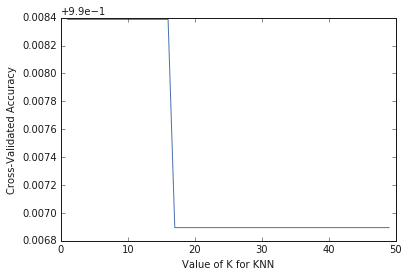

In [81]:
from sklearn.model_selection import cross_val_score
k_range = range(1,50)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

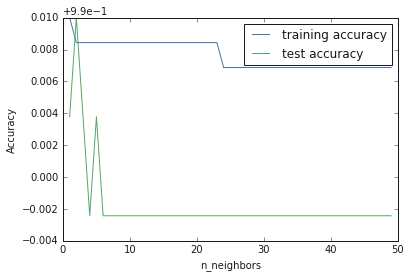

In [121]:
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 50)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [ ]:
#From testng a range of n values in the KNN model, it appears that accuracy isn't 
#enhanced with any more neighbors above 17. 
#Cross validation will be used to determine the optimal n_neighbors

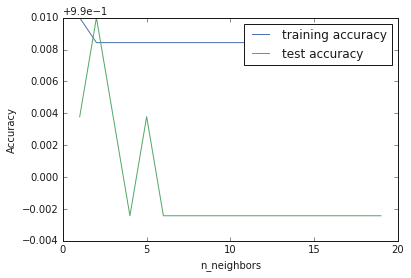

In [183]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 20
neighbors_settings = range(1, 20)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [144]:
#After looking at the graph comparing performance from k = 1 to 20 nearest neighbors
#it looks like 3 and 5 might be optimal.
#Let's try each of them out and go on from there.

In [244]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
y_model = clf.predict(X_test)
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.99


In [246]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
y_model = clf.predict(X_test)
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.99


In [82]:
#Random Forest

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=5000, n_features=20352,
                           n_informative=5, n_redundant=0,
                           n_classes=5, random_state=1, 
                           shuffle=False)

X_train, X_test, y_train, y_test = train_test_split(X, y)

model = RandomForestClassifier(max_depth=2, random_state=1)
model.fit(X_train, y_train)

/Users/capio/anaconda2/lib/python2.7/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [90]:
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=model.predict(X_test))
print(sk_report)
predicted=cross_val_predict(model, X,y,cv=10)
print metrics.accuracy_score(y, predicted)
print metrics.classification_report(y, predicted) 

              precision    recall  f1-score   support

           0   0.286517  0.612000  0.390306       250
           1   0.267857  0.118577  0.164384       253
           2   0.403743  0.618852  0.488673       244
           3   0.200000  0.148760  0.170616       242
           4   0.160000  0.030651  0.051447       261

   micro avg   0.302400  0.302400  0.302400      1250
   macro avg   0.263623  0.305768  0.253085      1250
weighted avg   0.262456  0.302400  0.250495      1250

0.26
              precision    recall  f1-score   support

           0       0.28      0.46      0.35      1007
           1       0.22      0.16      0.19      1002
           2       0.33      0.36      0.35       998
           3       0.22      0.20      0.21      1005
           4       0.17      0.11      0.13       988

   micro avg       0.26      0.26      0.26      5000
   macro avg       0.25      0.26      0.25      5000
weighted avg       0.25      0.26      0.25      5000



In [91]:
# DECISION TREES

In [92]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=1)
tree.fit(X_train, y_train)
y_model = tree.predict(X_test)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.578


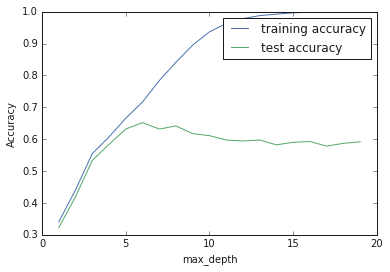

In [252]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
max_depth_settings = range(1, 20)

for max_depth in max_depth_settings:
    # build the model
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(max_depth_settings, training_accuracy, label="training accuracy")
plt.plot(max_depth_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.legend()

In [93]:
# NAIVE BAYES 

In [94]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy_score(y_test, y_pred, normalize = True)

0.2704

In [95]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of Naive Bayes classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of Naive Bayes classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))


Accuracy of Naive Bayes classifier on training set: 1.00
Accuracy of Naive Bayes classifier on test set: 0.27


In [96]:
# NEURAL NETWORK

In [97]:
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier(solver='lbfgs')
mlpc.fit(X_train,y_train)
print('Accuracy of NN classifier on training set: {:.2f}'
     .format(mlpc.score(X_train, y_train)))
print('Accuracy of NN classifier on test set: {:.2f}'
     .format(mlpc.score(X_test, y_test)))

Accuracy of NN classifier on training set: 1.00
Accuracy of NN classifier on test set: 0.28


In [98]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)
print('Accuracy of SVC classifier on training set: {:.2f}'
     .format(svc.score(X_train, y_train)))
print('Accuracy of SVC classifier on test set: {:.2f}'
     .format(svc.score(X_test, y_test)))


/Users/capio/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of SVC classifier on training set: 1.00
Accuracy of SVC classifier on test set: 0.28


In [99]:
y_pred_class = svc.predict(X_test)
print metrics.accuracy_score(y_test, y_pred_class)
print metrics.confusion_matrix(y_test, y_pred_class)


0.2816
[[ 71  21  17 141   0]
 [ 45  25  27 155   1]
 [ 28  12  86 117   1]
 [ 36  13  26 167   0]
 [ 48  24  57 129   3]]


In [ ]:
# ASSOCIATIONS

In [119]:
medians = proj.median()

In [120]:
new_proj=(proj > medians).astype(int)
new_proj.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,gene_11,gene_12,gene_13,gene_14,gene_15,gene_16,...,gene_20514,gene_20515,gene_20516,gene_20517,gene_20518,gene_20519,gene_20520,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,1,1,0,0,0,1,0,1,1,0,0,0
2,0,1,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0
3,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,1,1,1,1,1,1,1,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,1,0,1,1,1,1,1,1,1,0,0,0,0


In [121]:
#taking a random sample of 2000 columns and all 801 rows to make running of the code faster

#df.sample(2, axis=1)
random_proj=new_proj.sample(2000,axis=1)
random_proj.head()

,gene_15994,gene_19782,gene_18515,gene_9326,gene_7505,gene_6078,gene_15872,gene_12655,gene_5649,gene_294,gene_9147,gene_13858,gene_6397,gene_11888,gene_14212,gene_17694,gene_7680,...,gene_9022,gene_9464,gene_15338,gene_2090,gene_7783,gene_6250,gene_11903,gene_13585,gene_1131,gene_19944,gene_15779,gene_7645,gene_9490,gene_11412,gene_6711,gene_681,gene_9937
0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,...,1,1,0,1,0,0,0,1,1,0,1,1,1,1,1,0,0
1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,...,0,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
2,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,...,0,0,1,1,1,1,0,0,1,1,1,0,0,1,0,0,0
3,0,0,1,0,1,1,1,0,1,0,0,0,0,1,0,0,1,...,0,0,1,0,1,1,0,1,0,1,1,0,1,1,1,0,0
4,1,1,1,0,0,1,1,0,1,1,1,1,1,1,1,0,0,...,0,1,1,0,0,1,0,0,0,1,1,1,1,0,1,1,0


In [122]:
#adding the tumor type labelled as "class" into the converted 0,1 dataset
random_proj.insert(loc = 0, column = 'Class', value = labels)

In [123]:
proj_dum=random_proj

In [124]:
proj_dum=pd.get_dummies(proj_dum, columns=["Class"])
proj_dum.head(5)

,gene_15994,gene_19782,gene_18515,gene_9326,gene_7505,gene_6078,gene_15872,gene_12655,gene_5649,gene_294,gene_9147,gene_13858,gene_6397,gene_11888,gene_14212,gene_17694,gene_7680,...,gene_6250,gene_11903,gene_13585,gene_1131,gene_19944,gene_15779,gene_7645,gene_9490,gene_11412,gene_6711,gene_681,gene_9937,Class_BRCA,Class_COAD,Class_KIRC,Class_LUAD,Class_PRAD
0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,...,0,0,1,1,0,1,1,1,1,1,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,...,0,1,0,1,1,0,1,0,1,0,1,0,0,0,0,1,0
2,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,...,1,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,1
3,0,0,1,0,1,1,1,0,1,0,0,0,0,1,0,0,1,...,1,0,1,0,1,1,0,1,1,1,0,0,0,0,0,0,1
4,1,1,1,0,0,1,1,0,1,1,1,1,1,1,1,0,0,...,1,0,0,0,1,1,1,1,0,1,1,0,1,0,0,0,0


In [138]:
#I will use apriori to find frequent itemsets. I will limit the max length to 2

freq_random=apriori(proj_dum, min_support=0.2, max_len=2, use_colnames=True)
freq_random['length'] = freq_random['itemsets'].apply(lambda x: len(x))

In [139]:
freq_random

,support,itemsets,length
0,0.499376,(gene_15994),1
1,0.499376,(gene_19782),1
2,0.499376,(gene_18515),1
3,0.410737,(gene_9326),1
4,0.499376,(gene_7505),1
5,0.499376,(gene_6078),1
6,0.499376,(gene_15872),1
7,0.499376,(gene_5649),1
8,0.498127,(gene_294),1
9,0.499376,(gene_9147),1


In [140]:
#Now with frequent itemsets generated, I can use association rules at some min threshold, 
#I will choose a min lift of 2 first.

In [148]:
from mlxtend.frequent_patterns import association_rules

rules=association_rules(freq_random, metric="lift", min_threshold=2)
rules.sort_values(['lift'],ascending=False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(gene_18905),(gene_5453),0.392010,0.491885,0.39201,1.000000,2.032995,0.199186,inf
3,(gene_5453),(gene_18905),0.491885,0.392010,0.39201,0.796954,2.032995,0.199186,2.994351
0,(gene_18905),(gene_19913),0.392010,0.499376,0.39201,1.000000,2.002500,0.196250,inf
1,(gene_19913),(gene_18905),0.499376,0.392010,0.39201,0.785000,2.002500,0.196250,2.827861
4,(gene_18905),(gene_11920),0.392010,0.499376,0.39201,1.000000,2.002500,0.196250,inf
5,(gene_11920),(gene_18905),0.499376,0.392010,0.39201,0.785000,2.002500,0.196250,2.827861


In [142]:
#I can search the rules generated from the apriori where the antecedent is a tumor type
rules[ rules['antecedents'] == {'Class_BRCA'} ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [143]:
rules[ rules['antecedents'] == {'Class_COAD'} ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [144]:
rules[ rules['antecedents'] == {'Class_KIRC'} ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [145]:
rules[ rules['antecedents'] == {'Class_LUAD'} ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [146]:
rules[ rules['antecedents'] == {'Class_PRAD'} ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
